## Import libraries and get to know the data

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [51]:
df = pd.read_csv('/home/mike/Documents/ML-A-to-Z/classification/Heart_disease_prediction/data/heart.csv')

In [52]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [53]:
df.shape

(303, 14)

In [54]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data cleaning
###1) check the data types

*   catagorical
*  continous : age, trestbps, chol..

In [56]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [57]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

###2) now check for the data charaacter mistake


a) We expected the column ca to have values from 0 to 3, but pandas shows it has a value '4' too — which must be a mistake or missing data. lets change it to"NaN"

In [58]:
df["ca"].unique()

array([0, 2, 1, 3, 4])

In [59]:
df.ca.value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [60]:
df[df["ca"] ==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [61]:
df.loc[df["ca"] ==4, "ca"] = np.nan

In [62]:
df["ca"].unique()

array([ 0.,  2.,  1.,  3., nan])

 b) Feature ‘thal’ ranges from 1–3, however, df.nunique() listed 0–3. There are two values of ‘0’. So lets change them to NaN.

In [63]:
df["thal"].value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [64]:
df["thal"].nunique()

4

In [65]:
df["thal"].unique()

array([1, 2, 3, 0])

In [66]:
df[df["thal"]== 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [67]:
df.loc[df["thal"]== 0, "thal"] = np.nan

In [68]:
df["thal"].unique()

array([ 1.,  2.,  3., nan])

###3) Check for missing values and filling them

In [69]:
df = df.fillna(df.median())

In [70]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [71]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


###4) detecting outliers and remove them

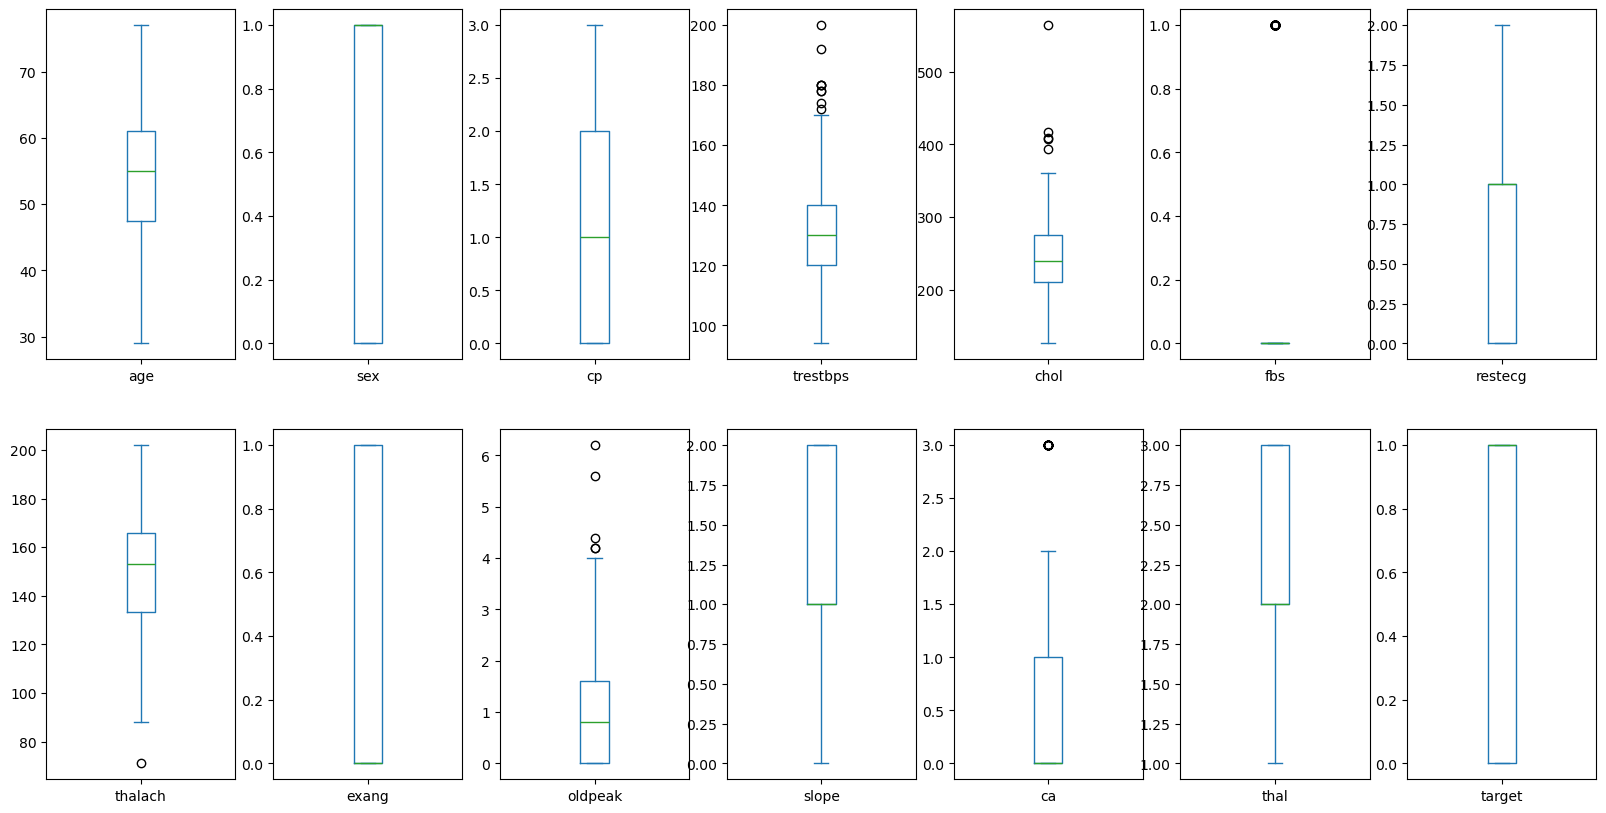

In [72]:
df.plot(kind = "box", subplots = True, layout = (2, 7), sharex = False, sharey = False, figsize = (20,10));

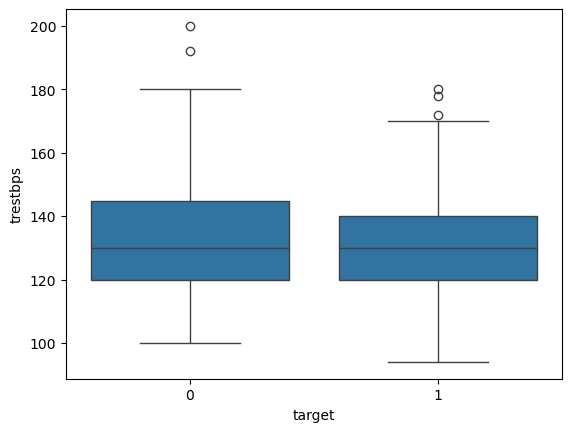

In [73]:
sns.boxplot(x=df["target"], y =df["trestbps"]);

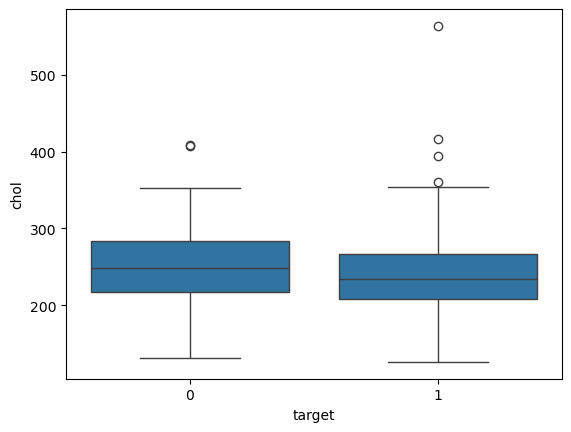

In [74]:
sns.boxplot(x=df["target"], y =df["chol"]);

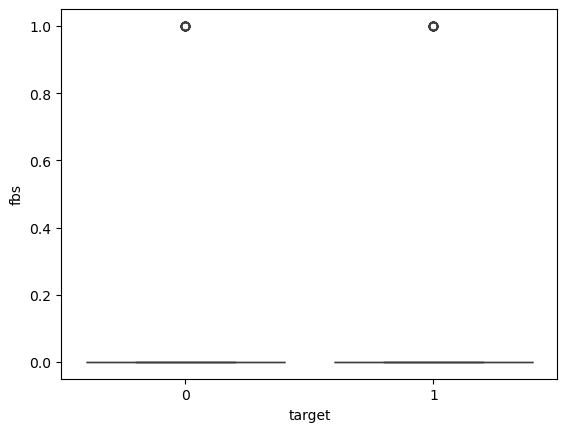

In [75]:
sns.boxplot(x=df["target"], y =df["fbs"]);

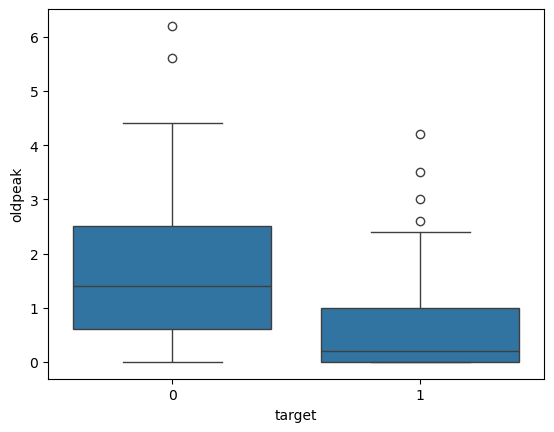

In [76]:
sns.boxplot(x=df["target"], y =df["oldpeak"]);

###  let’s change the labeling for better visualization and interpretation.

In [77]:
df["target"] = df.target.replace({1: "Disease", 0 : "No_Disease"})
df["sex"] = df.sex.replace({1: "Male", 0: "Female"})
df["cp"] = df.cp.replace({0: "typlical_angina",
                          1: "atypical_angina",
                          2: "non_anginal_pain",
                          3: "asymtomatic"})
df["exang"] = df.exang.replace ({1: "Yes",0: "no"})
df["thal"] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3: "normal"})
df["slope"] = df.slope.replace({0: "upsloping", 1: "flat ", 2: "downsloping"})
df["fbs"] = df.fbs.replace({1: "True", 0: "False"})

In [78]:
continous_features = ["age", "trestbps","chol", "thalach", "oldpeak"]
def outliers(df_out, drop = False):
  for each_feature in df_out.columns:
    feature_data = df_out[each_feature]
    Q1 = np.percentile(feature_data, 25.)
    Q3 = np.percentile(feature_data, 75.)
    IQR = Q3-Q1
    outlier_step = IQR * 1.5
    outliers = feature_data[~((feature_data >= Q1 - outlier_step)& (feature_data <= Q3 + outlier_step))].index.tolist()
    if not drop:
      print("For the feature {}, No of outliers is {}". format(each_feature, len(outliers)))
    if drop:
      df.drop(outliers, inplace = True, errors = "ignore")
      print("outliers from {} feature removed".format(each_feature))

### let's define and list out the outiers

In [79]:
outliers(df[continous_features])

For the feature age, No of outliers is 0
For the feature trestbps, No of outliers is 9
For the feature chol, No of outliers is 5
For the feature thalach, No of outliers is 1
For the feature oldpeak, No of outliers is 5


In [80]:
outliers(df[continous_features], drop = True)

outliers from age feature removed
outliers from trestbps feature removed
outliers from chol feature removed
outliers from thalach feature removed
outliers from oldpeak feature removed


##target variable distribution

In [81]:
df["target"].value_counts()

target
Disease       159
No_Disease    125
Name: count, dtype: int64

[Text(0, 0, 'Disease'), Text(1, 0, 'No_Disease')]

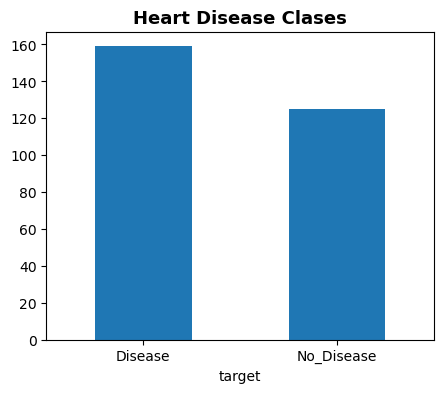

In [82]:
fig, axe = plt.subplots(figsize = (5,4))
name = ['Disease', 'No_Disease']
ax = df['target'].value_counts().plot(kind = 'bar')
ax.set_title("Heart Disease Clases", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

In [83]:
# Count occurrences of each class
df['target'].value_counts(normalize=True) * 100

target
Disease       55.985915
No_Disease    44.014085
Name: proportion, dtype: float64

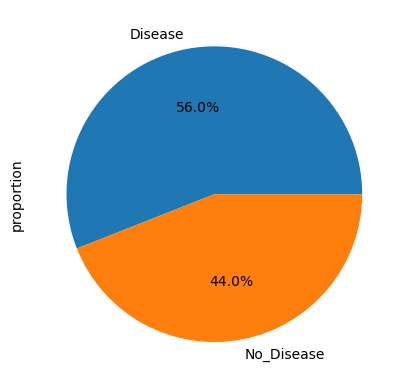

In [84]:
df['target'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%');

###so from the above chart we can conclude that there are more diseased than the healthy patients

##Age variable distribution

Text(0.5, 1.0, 'Age Distriution')

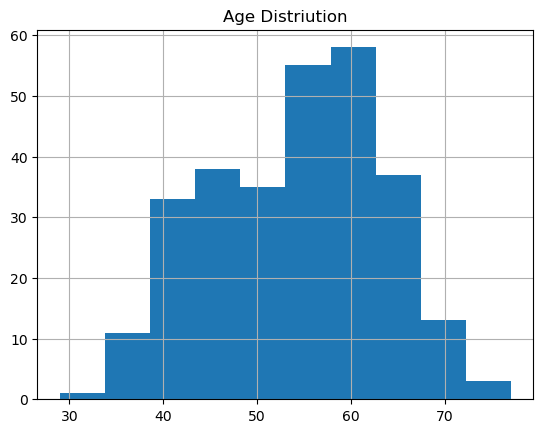

In [85]:
df["age"].hist().plot(kind = "hist")
plt.title("Age Distriution")


### as we see the age is normally distributed, Most of th patients are in the age of 50s and 60s

##Gender distribution to the target varable

In [86]:
df["sex"].value_counts()

sex
Male      199
Female     85
Name: count, dtype: int64

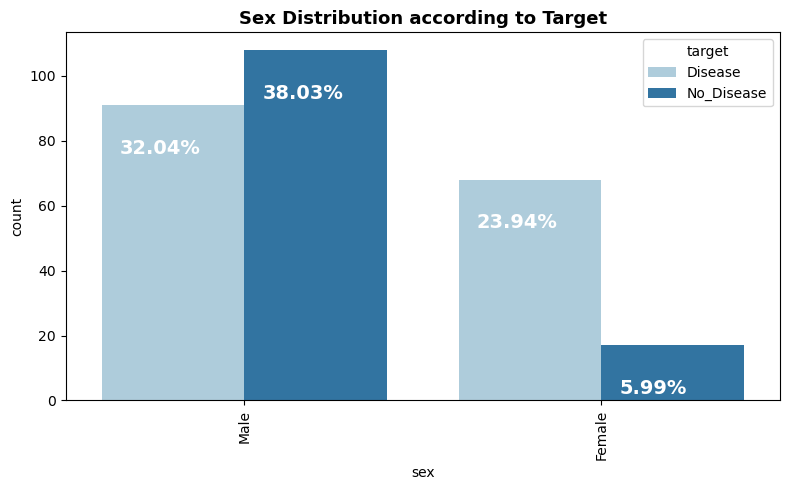

In [87]:
fig, ax = plt.subplots(figsize = (8, 5))
name = df["sex"].unique()
ax = sns.countplot( x= "sex", hue = 'target', data = df, palette = 'Paired')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 90)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
plt.tight_layout()

### As we can understand from the above graph males are highly diagnosed than females

##cp(Chest Pain) distribution according to the the target varible

In [88]:
df['cp'].value_counts()

cp
typlical_angina     130
non_anginal_pain     83
atypical_angina      49
asymtomatic          22
Name: count, dtype: int64

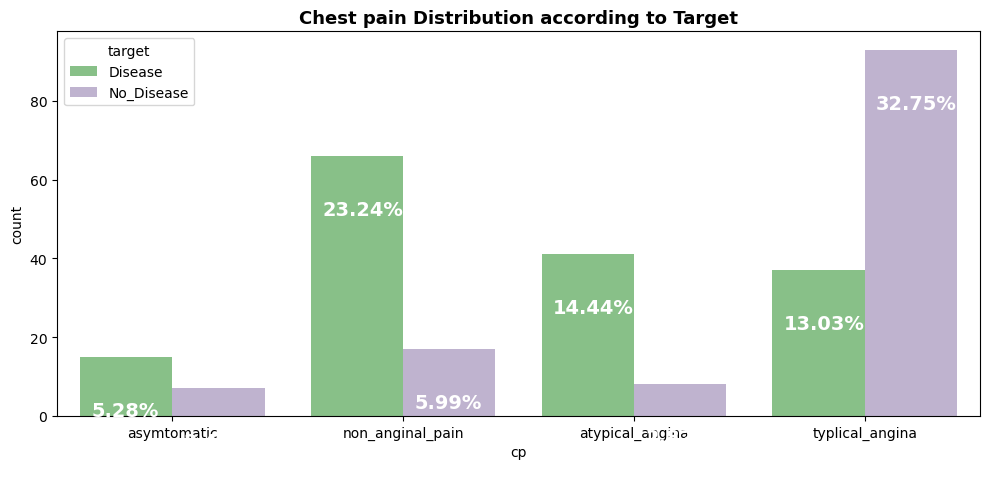

In [89]:
fig, ax = plt.subplots(figsize = (10, 5))
name = df["cp"].unique()
ax = sns.countplot(x = 'cp', hue = 'target', data = df, palette = 'Accent')
ax. set_title('Chest pain Distribution according to Target', fontsize = 13, weight = 'bold')
ax. set_xticklabels(name, rotation  = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
plt.tight_layout()

### Overall Conclusion from the above data

*   
    Chest pain type is a useful predictor of heart disease.
*   Typical angina → more likely no disease


*   Non-anginal, atypical, and asymptomatic → higher likelihood of heart disease





    

    

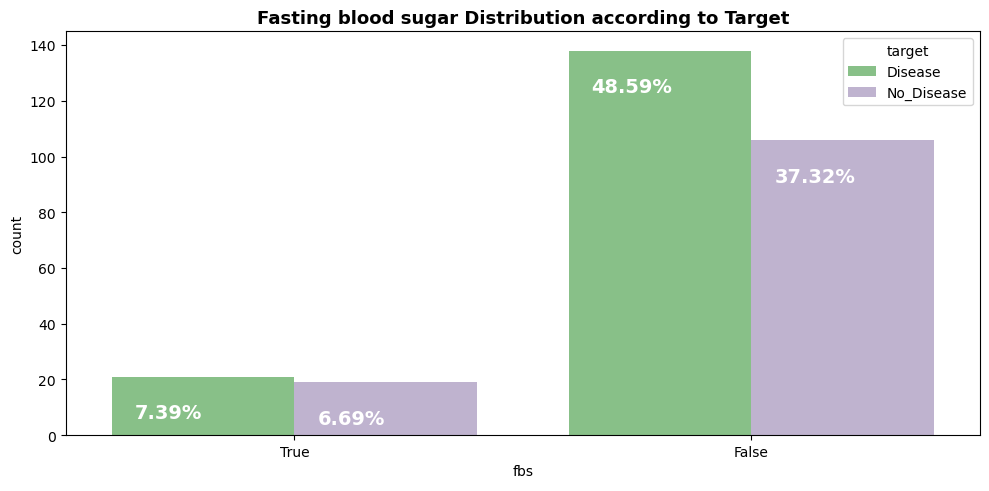

In [90]:
fig, ax = plt.subplots(figsize = (10, 5))
name = df["fbs"].unique()
ax = sns.countplot(x = 'fbs', hue = 'target', data = df, palette = 'Accent')
ax. set_title('Fasting blood sugar Distribution according to Target', fontsize = 13, weight = 'bold')
ax. set_xticklabels(name, rotation  = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
plt.tight_layout()

#### slope distribution to target variale

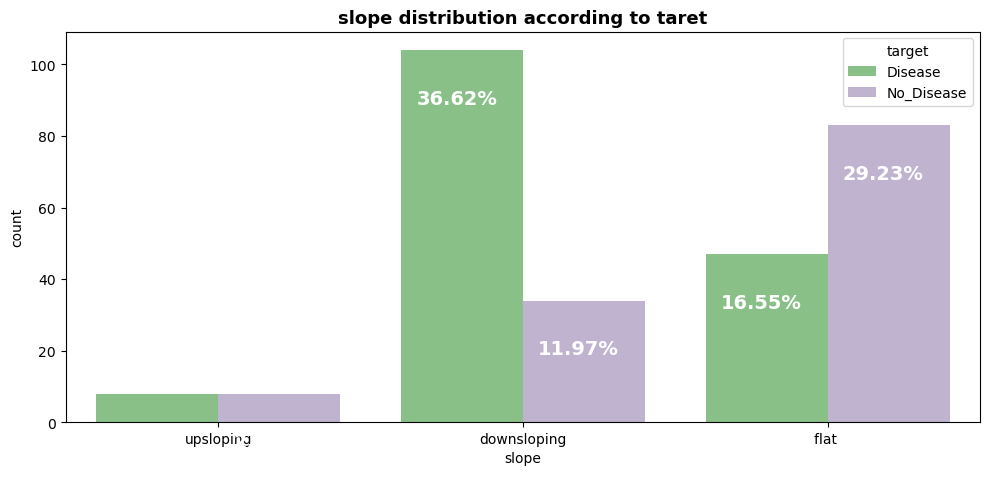

In [91]:
fig, ax = plt.subplots(figsize = (10,5))
name = df['slope'].unique()
ax = sns.countplot(x = 'slope', hue = 'target', data = df, palette = 'Accent')
ax.set_title('slope distribution according to taret', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
plt.tight_layout()

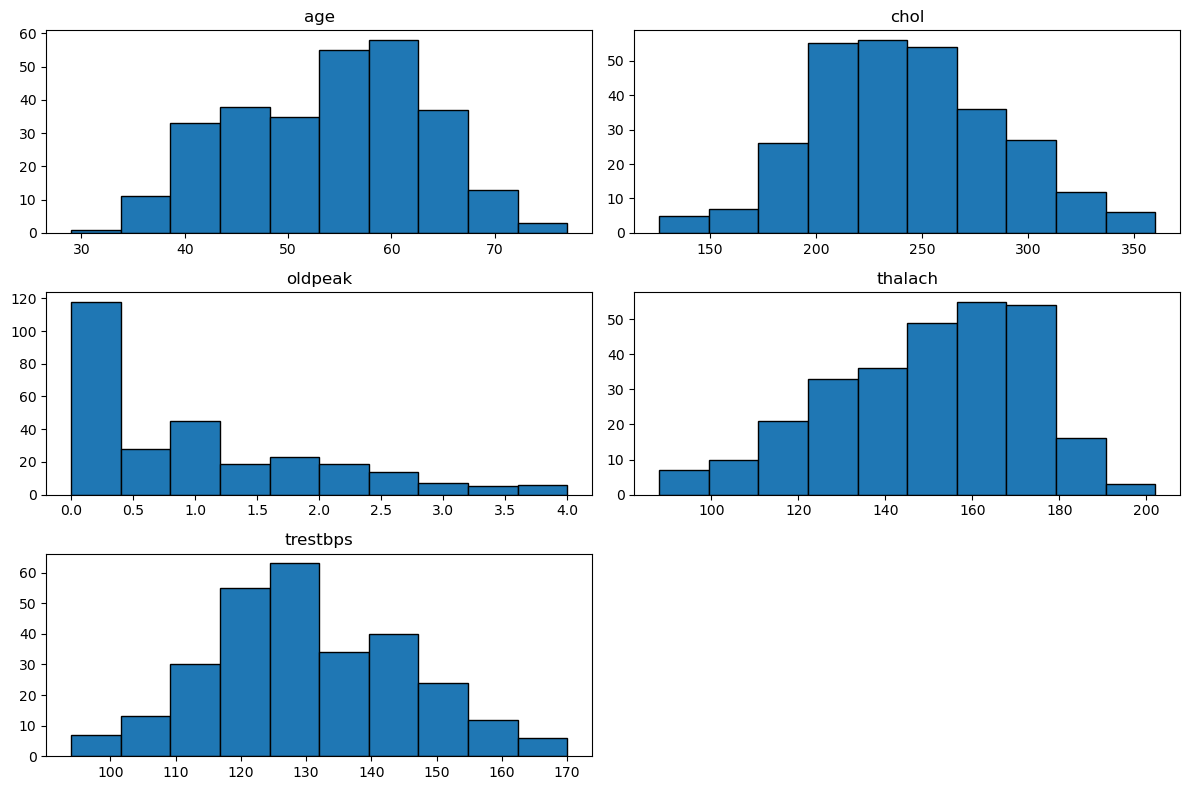

In [92]:
features = ['age', 'chol', 'oldpeak', 'thalach', 'trestbps']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1) 
    plt.hist(df[feature], bins=10, edgecolor='black')
    plt.title(feature)

plt.tight_layout()
plt.show()

In [96]:
df["target"] = df.target.replace({"Disease":1, "No_Disease": 0})
df["sex"] = df.sex.replace({"Male":1,"Female":0})
df["cp"] = df.cp.replace({"typlical_angina": 0,
                          "atypical_angina": 1,
                          "non_anginal_pain": 2,
                          "asymtomatic": 3})
df["exang"] = df.exang.replace ({"Yes":1, "no":0})
df["thal"] = df.thal.replace({"fixed_defect": 1, "reversable_defect":2 , "normal": 3})
df["slope"] = df.slope.replace({"upsloping": 0, "flat ": 1, "downsloping": 2})
df["fbs"] = df.fbs.replace({ "True":1, "False": 0})

In [97]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0.0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0.0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2.0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1.0,3,0


#### Evaluation Metrics for Classification model
1. Accuracy

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


np.random.seed(42)

x =df.drop("target", axis = 1)
y = df["target"]

clf = RandomForestClassifier()
cross_val_score(clf, x, y, cv = 5)

array([0.84210526, 0.87719298, 0.80701754, 0.85964912, 0.78571429])

In [111]:
cross_val_score = cross_val_score(clf, x, y, cv = 5)

In [112]:
np.mean(cross_val_score)

np.float64(0.8272556390977444)

In [113]:
print(f"Heart disease Classifier Accuracy: {np.mean(cross_val_score)*100: 2f}%")

Heart disease Classifier Accuracy:  82.725564%
